In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

from gym_power_trading.envs import PowerTradingEnv
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env

In [13]:
global _debug
_debug = False

In [ ]:
file_name = 'data\AEP_PSGC1_AMP_long.h5'
path = Path(file_name).resolve()
uri = str(path)
df = pd.read_hdf(uri)
df.head()

In [ ]:
my_dataframe = pd.read_csv("sinusoidal_data_10000_multi_period.csv")
plt.plot(my_dataframe)

In [14]:
env = PowerTradingEnv(df=my_dataframe, window_size=3, frame_bound=(10, 100))
obs = env.reset()
for _ in tqdm(range(100)):
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    print(info)
    if truncated:
        obs = env.reset()

100%|██████████| 100/100 [00:00<00:00, 19977.63it/s]

{'total_reward': 0.0, 'total_profit': 0.0, 'position': <Actions.Discharge: 1>, 'battery_charge': 0.0}
{'total_reward': -0.0014138978719711315, 'total_profit': 0.0, 'position': <Actions.Charge: 2>, 'battery_charge': 20.0}
{'total_reward': -0.009107849150896075, 'total_profit': 0.0, 'position': <Actions.Charge: 2>, 'battery_charge': 40.0}
{'total_reward': 0.2703424422442913, 'total_profit': 0.27805303993821145, 'position': <Actions.Discharge: 1>, 'battery_charge': 20.0}
{'total_reward': 0.6753292052447797, 'total_profit': 0.6810148691236972, 'position': <Actions.Discharge: 1>, 'battery_charge': 0.0}
{'total_reward': 0.6788050253689291, 'total_profit': 0.6810148691236972, 'position': <Actions.Charge: 2>, 'battery_charge': 20.0}
{'total_reward': 0.7347409029304983, 'total_profit': 0.6810148691236972, 'position': <Actions.Discharge: 1>, 'battery_charge': 0.0}
{'total_reward': 0.7347409029304983, 'total_profit': 0.6810148691236972, 'position': <Actions.Discharge: 1>, 'battery_charge': 0.0}
{

In [15]:
check_env(env, warn=True)

In [16]:
venv = make_vec_env(lambda: PowerTradingEnv(df=my_dataframe, window_size=3, frame_bound=(10, 100)))

### Need to Modify pre-processing function, otherwise self._observation_space produces mismatch produces broadcast error during learning

In [17]:
model = PPO('MlpPolicy', venv, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2082 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1492        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010202027 |
|    clip_fraction        | 0.0953      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.0192     |
|    learning_rate        | 0.0003      |
|    loss                 | 9.84        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 30.9        |
-----------------------------------------
-----------------

{'total_reward': 1576.5075912239035, 'total_profit': 1082.732463001245, 'position': <Actions.Discharge: 1>, 'battery_charge': 20.0}


[]

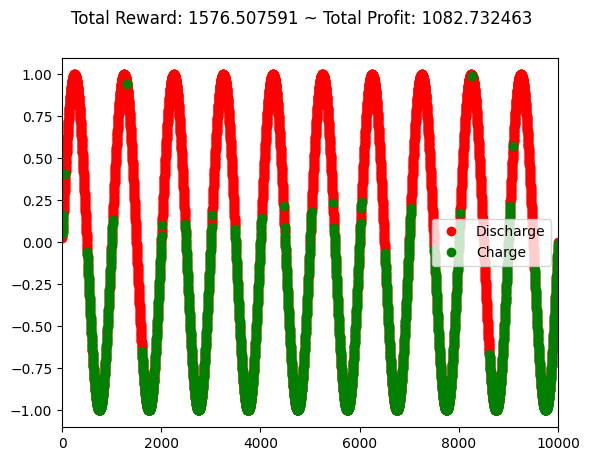

In [19]:
env2 = PowerTradingEnv(df=my_dataframe, window_size=3, frame_bound=(10, 100))
obs = env2.reset()
obs = obs[0]

for i in range(len(my_dataframe)):
    action, states = model.predict(obs)
    obs, rewards, term, trunc, info = env2.step(action)
    if term or trunc:
        pos = env2.render_all()
        print(info)
        env2.reset()


plt.plot()

In [20]:
from collections import deque

x = deque(maxlen=5)
x.append(1)

In [21]:
x.append(4)
np.flip(np.array(x).reshape(-1, 1))

array([[4],
       [1]])